# <center> Julia Tutorial Notebook <center>

Le langage Julia est un langage interprété i.e qu'un interpréteur Julia analyse le code pour l'exécuter. Cela le différencie des langages compilés (comme le C) où l'analyse du code et sa traduction en binaire se font une fois au moment de la compilation.

## Opérations arithmétiques de base

Le langage Julia est avant tout une grosse calculatrice. On peut effectuer toutes les opérations arithmétiques élémentaires : 

In [1]:
# Addition 
3+4

7

In [2]:
# Soustraction
10-17

-7

In [3]:
# Multiplication
8*7

56

In [4]:
# Division
13/3

4.333333333333333

In [5]:
# Modulo
32%3

2

In [6]:
# Puissance
5^4

625

Le parenthésage et les règles de priorité sont les mêmes que pour les mathématiques ordinaires.

In [7]:
1+4/(10-8)*5*(1+3) # = 1 + 2*5*4 = 41

41.0

ASTUCE : si on ne veut pas afficher la sortie d'une case dans le notebook, il suffit d'ajouter ";" à la fin de l'instruction. Par défaut le notebook affichera la dernière valeur calculée dans la cellule.

In [8]:
3+4;

## Les variables

Pour effectuer des calculs plus complexes et plus génériques, on peut stocker des valeurs dans des variables et réaliser des opérations sur ces mêmes variables sans connaître nécessairement leur valeur au moment de l'exécution.

In [9]:
# On affecte une valeur à une variable avec le signe "="
x = 10

10

In [10]:
# Une fois assignée, la variable x garde en mémoire sa valeur affectée. 
x

10

In [11]:
# On peut modifier à tout moment la valeur de x
x = 20

20

In [12]:
# On peut effectuer des opérations arithmétiques avec une variable... 
x+3

23

In [13]:
# ... ou plusieurs variables...
y = 13
x*y

260

In [14]:
# ... et stocker le résultat dans une autre variable.
z = x-y

7

In [15]:
# On peut également stocker dans une variable un résultat impliquant cette même variable
x += 1 # raccourci pour effectuer l'opération x = x+1 

21

In [16]:
# Affecter la valeur d'une variable à une autre variable copie la valeur en question 
x = 4 
y = x  # y vaut 4 
x = 3  # x est modifié à 3
y      # la valeur de y reste 4

4

## Les types

En Julia il est possible de manipuler autre chose que des nombres, et même différents types de nombre. Ce sont les "types" des variables. La fonction typeof() permet d'obtenir le type d'une variable ou d'une constante. Il existe par exemple : 

In [17]:
# Les entiers
x = 3
typeof(x)

Int32

In [18]:
# Les flottants
typeof(3.4)

Float64

In [19]:
# Les complexes 
typeof(1 + 2im) # im pour l'imaginaire pur !

Complex{Int32}

In [20]:
# Sur les architectures 64 bits les entiers et les flottants sont stockés sur 64 bits.
# On peut calculer ainsi l'entier maximum encodable sur 64 bits : 
typemax(Int64)  # = 2^63 - 1

9223372036854775807

In [21]:
# Attention car certaines opérations ne sont plus correctes quand cela implique des entiers trop grands 
typemax(Int64) + 1 

-9223372036854775808

L'arithmétique sur les entiers 64 bits en Julia peut être vue comme une arithmétique modulaire où le modulo est à 2^63 et recommence à -2^63.

Il est possible de stocker des variables sur moins de bits et d'effectuer des opérations sur ces types moins gourmands en mémoire. C'est utile en embarqué et plus généralement en calcul scientifique où le temps de calcul peut être considérablement réduit en travaillant sur des entiers et flottants encodés sur moins de bits. 

In [22]:
# Un entier sur 8 bits 
n = Int8(4)
typeof(n)

Int8

In [23]:
# On ne peut manipuler que des entiers entre -2^7 et 2^7-1 avec des entiers sur 8 bits. 
m = Int8(125)
n+m # même constation qu'avec les entiers sur 64 bits

-127

D'autres types sont disponibles en Julia. Par exemple les booléens qui prennent la valeur VRAI ou FAUX et sur lesquels des opérations logiques peuvent être appliqués. 

In [24]:
a = true
b = false

# ET 
a && b 

false

In [25]:
# OU 
a || b

true

In [26]:
# OU Exclusif 
a ⊻ b # taper \xor puis tab

true

In [27]:
# NON
!a 

false

In [28]:
# L'égalité entre deux variables peut être testée avec l'opérateur ==
x = 1
y = 2
x == y

false

On peut également manipuler des caractères et des chaînes de caractère -- généralement pour manipuler du texte. Un caractère est défini entre guillemets simples et les chaînes de caractères entre guillemets doubles.

In [29]:
un_caractere = 'a'

'a': ASCII/Unicode U+0061 (category Ll: Letter, lowercase)

In [30]:
une_chaine_de_caractere = "Je m'appelle Toto."

"Je m'appelle Toto."

In [31]:
# À ne pas faire ! 
a = 'ok'

LoadError: syntax: invalid character literal

Plein d'opérations sont disponibles sur les chaînes de caractères. On peut concaténer plusieurs chaînes avec l'opérateur *. 

In [32]:
ma_longue_chaine = "Franklin sait compter deux par deux" * " et lacer ses chaussures."

"Franklin sait compter deux par deux et lacer ses chaussures."

Ou bien répéter plusieurs fois la même chaîne avec l'opérateur ^

In [33]:
ma_tres_longue_chaine = "Le pouvoir de l'amitié triomphe toujours. " ^ 10

"Le pouvoir de l'amitié triomphe toujours. Le pouvoir de l'amitié triomphe toujours. Le pouvoir de l'amitié triomphe toujours. Le pouvoir de l'amitié triomphe toujours. Le pouvoir de l'amitié triomphe toujours. Le pouvoir de l'amitié triomphe toujours. Le pouvoir de l'amitié triomphe toujours. Le pouvoir de l'amitié triomphe toujours. Le pouvoir de l'amitié triomphe toujours. Le pouvoir de l'amitié triomphe toujours. "

Il est possible de diviser une chaîne de caractères en mots avec la fonction split()

In [34]:
split(une_chaine_de_caractere)

3-element Array{SubString{String},1}:
 "Je"       
 "m'appelle"
 "Toto."    

Split repère les caractères " " et divise sa chaîne en prenant les chaînes de caractère avant/après ce caractère spécial. Il est possible de choisir un autre caractère séparateur, par exemple : 

In [35]:
split(une_chaine_de_caractere, "e")

4-element Array{SubString{String},1}:
 "J"     
 " m'app"
 "ll"    
 " Toto."

Enfin, l'opération inverse i.e regrouper des chaînes de caractères ensemble est possible. On peut également spécifier une chaîne de caractère à insérer entre chaque chaîne.

In [36]:
ma_nouvelle_super_chaine = join(["Je mange du pâté ", "à la maison ", "et c'est bon."], "tous les jours ")

"Je mange du pâté tous les jours à la maison tous les jours et c'est bon."

Rien n'empêche enfin de modifier une variable en lui attribuant un type différent.

In [37]:
x = 3

3

In [38]:
x = "Une phrase."

"Une phrase."

## Les vecteurs

Pour manipuler plusieurs données plus simplement qu'en leur attribuant à toutes une variable différente, il est possible de les stocker dans un vecteur. 

In [39]:
v = [1,2,3]

3-element Array{Int32,1}:
 1
 2
 3

Pour accéder aux éléments du vecteur on utilise la notation v[k] pour accéder au k-ième élément de v.

In [40]:
v[3]

3

Tenter d'accéder au 4e élément d'un vecteur de taille 3 soulève une erreur de l'interpréteur.

In [41]:
v[4]

BoundsError: BoundsError: attempt to access 3-element Array{Int32,1} at index [4]

On peut modifier un élément du vecteur comme on modifie une variable... 

In [42]:
v[2] = 100

100

In [43]:
v

3-element Array{Int32,1}:
   1
 100
   3

... toutefois il faut faire attention aux types autorisés dans le vecteur. Ici il n'est pas possible de mettre autre chose qu'un entier dans v. 

In [44]:
# Provoque une erreur 
v[2] = "ok"

MethodError: MethodError: Cannot `convert` an object of type String to an object of type Int32
Closest candidates are:
  convert(::Type{T<:Number}, !Matched::T<:Number) where T<:Number at number.jl:6
  convert(::Type{T<:Number}, !Matched::Number) where T<:Number at number.jl:7
  convert(::Type{T<:Integer}, !Matched::Ptr) where T<:Integer at pointer.jl:23
  ...

On récupère la taille d'un vecteur avec la fonction **length**

In [45]:
length(v)

3

Au moment de la création du vecteur, l'interpréteur détermine le type le plus restrictif auquel appartiennent tous les éléments. Ainsi par exemple : 

In [46]:
v = [1,2,3,4,5]

5-element Array{Int32,1}:
 1
 2
 3
 4
 5

crée un vecteur d'entiers. Si toutefois on rajoute un flottant  

In [47]:
v = [1,2,3,4,5,6.314]

6-element Array{Float64,1}:
 1.0  
 2.0  
 3.0  
 4.0  
 5.0  
 6.314

v devient un vecteur de flottants car l'interpréteur peut transformer des entiers en flottants ( l'inverse n'est pas vrai ! ). <br>
Si enfin on rajoute une chaîne de caractères

In [48]:
v = [1,2,3,4,5,6.314, "ok"]

7-element Array{Any,1}:
 1    
 2    
 3    
 4    
 5    
 6.314
  "ok"

v est un vecteur de "Any" i.e qu'il accepte n'importe quel type. Toutefois manipuler des vecteurs "Any" n'est pas recommandé car cela ralentit considérablement le temps de calcul. Exemple : 

In [49]:
@time sum(rand(1:100, 1000000))              # on somme tous les éléments d'un vecteur d'entiers 
@time sum(Vector{Any}(rand(1:100, 1000000))) # on somme tous les éléments d'un vecteur d'Any 

  0.044475 seconds (55.26 k allocations: 5.653 MiB, 5.53% gc time)
  0.182066 seconds (1.09 M allocations: 18.727 MiB, 29.60% gc time)


50490629

Le temps de calcul est quasiment 4 fois plus long pour un calcul élémentaire.

Deux manières sont possibles pour créer un vecteur : <br>
1) via la fonction push!( ) <br>
2) via l'affectation élément par élément 

In [50]:
# La fonction push!() permet de rajouter un élément au vecteur et augmente donc sa taille de 1 
v = [1,2,3]
push!(v,4)

4-element Array{Int32,1}:
 1
 2
 3
 4

In [51]:
# Attention ! Une fois le vecteur créé, il faut absolument rajouter des éléments de même type 
push!(v, 5.3) # soulève une erreur car v est un vecteur d'entiers

InexactError: InexactError: Int32(Int32, 5.3)

In [52]:
# Si on connaît la taille finale du vecteur, on peut initialiser un vecteur de cette taille 
# et le remplir élément par élément
v = zeros(Int, 5)  # crée un vecteur d'entiers de taille 5 rempli de 0 

5-element Array{Int32,1}:
 0
 0
 0
 0
 0

In [53]:
v[1] = 32
v[2] = 12
v[3] = 44
v

5-element Array{Int32,1}:
 32
 12
 44
  0
  0

In [54]:
# Si on utilise push!() ici les composantes 4 et 5 du vecteur seront toujours 0
push!(v, 100)

6-element Array{Int32,1}:
  32
  12
  44
   0
   0
 100

Voilà quelques autres manières d'initialiser un vecteur en Julia : 

In [55]:
v = zeros(Int, 5) # déjà vu : créer un vecteur d'entiers de taille 5 rempli de 0
v = ones(Int, 10) # identique à 0 sauf que v est rempli de 1
v = rand(Int, 10) # un vecteur aléatoire d'entiers 
v = rand(Bool, 10) # un vecteur aléatoire de booléens

10-element Array{Bool,1}:
 false
  true
  true
  true
 false
 false
 false
  true
 false
 false

La fonction rand est très expressive : 

In [56]:
using Distributions 
v = rand(1:10, 10) # génère un vecteur d'entiers aléatoires entre 1 et 10
v = rand(Uniform(0.1809, 1.02984), 10) # génère un vecteur de float aléatoirement et pris uniformément entre 0.1809 et 1.02984
v = rand(Poisson(10), 10) # génère un vecteur aléatoire d'entiers suivant une loi de Poisson de paramètre 10

10-element Array{Int32,1}:
 11
 14
  9
  3
 12
 11
 15
 10
 15
 12

Enfin on peut déclarer un vecteur d'un certain type et d'une certaine taille sans le remplir. La syntaxe à suivre est : 
Vector{Type}(undef, taille_du_vecteur)

In [57]:
v = Vector{Int}(undef, 10) # un vecteur d'entiers de taille 10 non initialisé

10-element Array{Int32,1}:
 -333850104
 -333850092
 -333850080
 -333850068
 -333848556
 -332980696
 -332980672
 -330495332
 -330758592
 -341393152

L'interpréteur va juste allouer de la mémoire pour le vecteur sans regarder ce qu'il y a dans les cases mémoire. Cela représente un gain de temps non négligeable pour de gros vecteurs.

In [58]:
@time v = Vector{Int}(undef, 10000000)
@time v = zeros(Int, 10000000);

  0.005188 seconds (6 allocations: 38.147 MiB, 99.24% gc time)
  0.031294 seconds (6 allocations: 38.147 MiB, 44.37% gc time)


### Quelques opérations élémentaires sur les vecteurs 

On peut sommer deux vecteurs de même taille : 

In [59]:
v = rand(1:10, 10)
w = rand(1:10, 10)
v+w

10-element Array{Int32,1}:
 11
 11
  6
 13
  7
 17
 11
 13
 10
  6

Le produit scalaire n'est pas accessible directement par le symbole *, il faut passer par la fonction dot.

In [60]:
using LinearAlgebra
dot(v,w)

252

Enfin on peut effectuer des opérations élémentaires (+, -, *, / ) élément par élément. Il suffit de rajouter un . devant l'opérateur : 

In [61]:
v .* w

10-element Array{Int32,1}:
 30
 10
  8
 30
 12
 72
 18
 40
 24
  8

In [62]:
v .+ w # ici il est inutile de mettre le . car l'opérateur + est déjà défini élément par élément

10-element Array{Int32,1}:
 11
 11
  6
 13
  7
 17
 11
 13
 10
  6

## Les structures de contrôle

Comment initialiser un vecteur de taille 100 ? de taille n où n ne sera connu que pendant l'exécution ? Pour manipuler plus facilement une grande quantité de données et de manière abstraite on utilise des structures de contrôle. Ce sont les structures de base qui permettent de construire des algorithmes plus complexes.

### La boucle for

La boucle for permet de parcourir une structure de données (un vecteur, une matrice etc.). Une variable de parcours prend successivement toutes les valeurs de la structure de données et on peut effectuer à chaque itération un même bloc d'instructions. Si ce bloc d'instructions fait intervenir la variable de parcours alors chaque bloc exécuté sera "adapté" à la valeur de la variable en cours. Mais il est possible de faire une boucle for pour simplement répéter plusieurs fois la même opération !

In [63]:
# Premier exemple : créer un vecteur de taille 100 
v = zeros(Int, 100)
for i = 100:-1:1          # raccourci pour parcourir tous les entiers de 100 à 1
    v[i] = 3*i - 4     # on peut ainsi accéder à chaque entrée du vecteur v et lui affecter une valeur
end                    # ne pas oublier le end !
v

100-element Array{Int32,1}:
  -1
   2
   5
   8
  11
  14
  17
  20
  23
  26
  29
  32
  35
   ⋮
 263
 266
 269
 272
 275
 278
 281
 284
 287
 290
 293
 296

La syntaxe est la suivante : <br>
for variable_de_parcours = structure_de_donnees_a_parcourir <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; BLOC d'INSTRUCTIONS <br>
end


On utilise généralement la boucle for pour parcourir un vecteur d'indices comme dans l'exemple du dessus mais il est possible de parcourir n'importe quelle structure de données ! Par exemple : 

In [64]:
v = [1, 3.4, "Toto"]
for i = v
    println(i)
end

1
3.4
Toto


Si le bloc d'instructions n'utilise jamais la variable de parcours, on effectue les mêmes calculs à chaque itération.

In [65]:
n = 100
for i=1:n  # on peut faire dépendre d'une variable le nombre d'itérations 
    println("Je suis un bloc d'instructions fier et indépendant.")
end

Je suis un bloc d'instructions fier et indépendant.
Je suis un bloc d'instructions fier et indépendant.
Je suis un bloc d'instructions fier et indépendant.
Je suis un bloc d'instructions fier et indépendant.
Je suis un bloc d'instructions fier et indépendant.
Je suis un bloc d'instructions fier et indépendant.
Je suis un bloc d'instructions fier et indépendant.
Je suis un bloc d'instructions fier et indépendant.
Je suis un bloc d'instructions fier et indépendant.
Je suis un bloc d'instructions fier et indépendant.
Je suis un bloc d'instructions fier et indépendant.
Je suis un bloc d'instructions fier et indépendant.
Je suis un bloc d'instructions fier et indépendant.
Je suis un bloc d'instructions fier et indépendant.
Je suis un bloc d'instructions fier et indépendant.
Je suis un bloc d'instructions fier et indépendant.
Je suis un bloc d'instructions fier et indépendant.
Je suis un bloc d'instructions fier et indépendant.
Je suis un bloc d'instructions fier et indépendant.
Je suis un b

#### Utilisations avancées de la boucle for 

Quand on parcourt un vecteur, la variable de parcours prend la valeur de chaque élément du vecteur. Toutefois il peut être utile d'avoir aussi une variable qui garde en mémoire l'indice d'emplacement de l'élément dans le vecteur également. Pour cela on utilise la structure "enumerate" : 

In [66]:
v = [1, "Toto", [1,2,3]]
for (indice, valeur) = enumerate(v)    # les variables de parcours sont des variables muettes qui n'existent que dans 
                                       # la boucle for 
    println("La valeur de v à l'indice ", indice, " est ", valeur)
end

La valeur de v à l'indice 1 est 1
La valeur de v à l'indice 2 est Toto
La valeur de v à l'indice 3 est [1, 2, 3]


Si l'on veut parcourir deux structures de données en parallèle, on utilise la fonction zip : 

In [67]:
v = [1,2,3,4]
u = ["Toto", "Tata", "Titi", "Tutu"]

for (a,b) = zip(v,u)
    println(a, " ", b)
end

1 Toto
2 Tata
3 Titi
4 Tutu


In [68]:
# Si les deux vecteurs ne sont pas de même taille le parcours s'arrête une fois le vecteur le plus court 
# entièrement parcouru
v = [1,2,3,4]
u = [5,6,7]

for (a,b) = zip(v,u)
    println(a , " " , b)
end

1 5
2 6
3 7


### La structure conditionnelle (if) 

Pour qu'un bloc d'instructions ne soit exécuté que si une condition est respectée, on utilise la structure if. <br> 
La syntaxe est la suivante : <br>
if condition <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; BLOC d'INSTRUCTIONS <br>
end

In [69]:
# Exemple : je veux afficher les nombres pairs entre 1 et 20 
for i=1:20
    if i%2 == 0 # si i est pair
        println(i) # j'affiche i
    end
end

2
4
6
8
10
12
14
16
18
20


Des structures plus complexes peuvent être mises en place : le mot clé "else" permet d'exécuter un bloc d'instructions si la condition du if est fausse. Le mot clé "else if" permet de tester une autre condition. 

In [70]:
# Exemple : pour les entiers entre 1 et 20 je veux afficher : 
# le carré des entiers divisibles par 4,
# le cube des entiers divisibles par 3, 
# l'inverse des entiers divisibles par 7,
# l'entier sans changement sinon.

for i=1:20
    if i%4 == 0
        println(i, "^2 = ", i^2)
    elseif i%3 == 0
        println(i, "^3 = ", i^3)
    elseif i%7 == 0
        println("1/",i," = ", 1/i)
    else
        println(i, " = ", i)
    end
end

1 = 1
2 = 2
3^3 = 27
4^2 = 16
5 = 5
6^3 = 216
1/7 = 0.14285714285714285
8^2 = 64
9^3 = 729
10 = 10
11 = 11
12^2 = 144
13 = 13
1/14 = 0.07142857142857142
15^3 = 3375
16^2 = 256
17 = 17
18^3 = 5832
19 = 19
20^2 = 400


Notez que dans le cas i=12, les deux conditions i%4==0 et i%3==0 sont vraies. Dans ce cas l'interpréteur rentrera dans la première condition vraie qu'il rencontre, ici i%4==0.

C'est là que les opérations de logique sur les booléens sont utiles. Une condition n'est rien d'autre qu'une expression booléenne qui prend la valeur VRAI ou FAUX. Si elle est vraie on effectue les instructions, sinon non. Les opérateurs logique permettent de créer des expressions booléennes plus complexes.

In [71]:
# Exemple : pour les entiers entre 1 et 30 je veux afficher : 
# le carré des entiers divisibles par 4 et 3,
# l'entier sans changement sinon.

for i=1:30
    if i%4 == 0 & i%3 == 0 # les deux conditions sont remplacées par une unique condition grâce à l'opérateur ET (&&)
        println(i, "^2 = ", i*i)
    end
end

4^2 = 16
8^2 = 64
12^2 = 144
16^2 = 256
20^2 = 400
24^2 = 576
28^2 = 784


### La boucle while 

Pour exécuter une opération tant qu'une condition est vérifiée on utilise la boucle while. La syntaxe est la suivante : <br>
while condition <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; BLOC d'INSTRUCTIONS <br>
end

In [72]:
# Exemple : tant que la variable i est plus petite que 100, je remplace i par i^2. 
i = 2
while i < 100
    i = i^2 
    println("i = ", i)
end

i = 4
i = 16
i = 256


ATTENTION ! Bien définir la condition d'arrêt d'une boucle while n'est pas toujours facile. <br>

In [73]:
# Exemple : je tire un entier au hasard entre 1 et 20. 
# Je continue tant que cet entier n'est pas égal à 20 mais je veux m'arrêter si j'ai tiré 10 nombres.

niter = 1 # le nombre d'itérations
p = rand(1:20) # choisit un entier uniformément entre 1 et 20
println("Itération n° ", niter, "   p = ", p)
while p != 20 && niter < 10 # on veut s'arrêter si p=20 ou niter=10, donc les deux conditions p!=20 et niter!=10 
                            # doivent être respectées pour continuer || non(A ou B) = non(A) et non(B)
    p = rand(1:20)
    niter += 1
    println("Itération n° ", niter, "   p = ", p)
end

Itération n° 1   p = 9
Itération n° 2   p = 11
Itération n° 3   p = 10
Itération n° 4   p = 15
Itération n° 5   p = 9
Itération n° 6   p = 17
Itération n° 7   p = 14
Itération n° 8   p = 20


Si la condition est mal définie, il y a le risque qu'elle reste vraie indéfiniment : c'est la boucle infinie ! <br>
La seule solution est de forcer l'arrêt du calcul sinon votre machine continuera jusqu'à sa mort.

In [74]:
# Exemples à ne pas reproduire : 
# 1) définir une condition avec une mauvaise variable 
a = 1
b = 2
while b < 100
    a += 1
end
# appuyer sur le carré stop au-dessus pour mettre fin au calcul

InterruptException: InterruptException:

In [75]:
# 2) la condition d'arrêt n'est pas respectée pour des cas particuliers
i = 1
while i < 100
    i = i^2 
    println("i = ", i)
end
# appuyer sur le carré stop au-dessus pour mettre fin au calcul

i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 

i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 

i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 

i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 

i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 

i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 

i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 

i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 

i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 

i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 

i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 

i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 

i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 

i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 

i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 

i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 

i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 

i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 

i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 

i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 

i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 

i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 

i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 

i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 

i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 1
i = 

InterruptException: InterruptException:

## Les fonctions

Pour réutiliser un morceau de code qui revient souvent, il est plus simple de stocker ce bloc d'instructions dans une fonction. Une fonction prend des arguments en entrée, effectue un bloc d'instructions et retourne éventuellement des valeurs en sortie. La syntaxe est : <br>
<br>
function nom_de_ma_fonction(argument1, argument2, ..., argument_k) <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; BLOC d'INSTRUCTIONS <br>
end

On a déjà croisé plein de fonctions dans ce tutoriel : enumerate, zip, println, rand, split, typeof...

In [76]:
# Exemple de fonction : calcule la plus grande puissance d'un entier plus petite que 10 000
function ma_fonction(a::Int)
    if a == 1
        return 1
    else
        n = 0
        while a^n < 10000
            n += 1
        end
        return a^(n-1)   # la fonction return permet de retourner une valeur
                         # on a la garantie que l'interpréteur sort de la fonction si le mot clé return est exécuté
    end
end

ma_fonction (generic function with 1 method)

In [77]:
# On peut récupérer la valeur retournée par la fonction (celle qui est donnée par le return dans la fonction)
b = ma_fonction(14)

2744

In [78]:
# On peut appeler la fonction pour différentes entrées 
for i=1:10
    println("La valeur de ma fonction pour i = ", i, " : ", ma_fonction(i))
end

La valeur de ma fonction pour i = 1 : 1
La valeur de ma fonction pour i = 2 : 8192
La valeur de ma fonction pour i = 3 : 6561
La valeur de ma fonction pour i = 4 : 4096
La valeur de ma fonction pour i = 5 : 3125
La valeur de ma fonction pour i = 6 : 7776
La valeur de ma fonction pour i = 7 : 2401
La valeur de ma fonction pour i = 8 : 4096
La valeur de ma fonction pour i = 9 : 6561
La valeur de ma fonction pour i = 10 : 1000


Il est beaucoup plus pratique de pouvoir réexécuter le code de ma_fonction en une ligne plutôt que de le réécrire à différents endroits de son code.

Il n'est pas obligatoire pour une fonction de retourner quelque chose. Elle peut simplement modifier une variable ou afficher quelque chose. <br>
Une fonction peut ne pas prendre d'arguments en entrée également.

In [79]:
function ma_phrase_preferee()  # une fonction sans arguments d'entrée
    println("1+1 = 11 et là c'est beau")
end

ma_phrase_preferee (generic function with 1 method)

In [80]:
ma_phrase_preferee()

1+1 = 11 et là c'est beau


In [81]:
# Si on assigne une variable à la sortie d'une fonction qui ne renvoie rien, l'interpréteur ne soulèvera pas d'erreur..
a = ma_phrase_preferee()

1+1 = 11 et là c'est beau


In [82]:
# .. mais le type de la variable sera le type "Nothing" car littéralement rien n'a été retourné par ma_phrase_preferee()
typeof(a)

Nothing

In [83]:
# Mettre un mauvais argument en entrée d'une fonction provoque une erreur de l'interpréteur
ma_phrase_preferee(4)

MethodError: MethodError: no method matching ma_phrase_preferee(::Int32)
Closest candidates are:
  ma_phrase_preferee() at In[79]:2

## Les matrices

L'utilisation des matrices est semblable à celle des vecteurs. C'est une structure de données à deux dimensions contenant un type de variables précis. 

L'initialisation des matrices est identique à celle pour les vecteurs. Pour les fonctions prédéfinies, il faut juste préciser les deux dimensions de la matrice et plus seulement la taille du vecteur.

In [84]:
A = zeros(Int, 10, 10) 

10×10 Array{Int32,2}:
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0

In [85]:
A = rand(-10:10, 5, 9) # une matrice 5x9 d'entiers dont les entrées sont choisies aléatoirement entre -10 et 10

5×9 Array{Int32,2}:
   7    2   0   -7   -7  -5  -2  -8    8
  -7    7  -9    0  -10  -1  10   4   -8
 -10    6   8  -10   -6  10  -1  -9  -10
  -4    2  -1    6    9  -1  -2   8    0
   7  -10   1    8   -2  10   3  -7   -5

Notez qu'un vecteur est désigné comme un Array{Type, 1} et une matrice comme un Array{Type, 2}. Les termes Vector{Type} et Matrix{Type} ne sont que des raccourcis pour Array{Type, 1} et Array{Type, 2}.

In [86]:
M = Matrix{Int}(undef, 10, 10);     #
                                    # ces deux instructions sont identiques
M = Array{Int, 2}(undef, 10, 10);   #

Pour initialiser à la main une matrice, il faut la remplir ligne par ligne avec des ";" pour séparer deux lignes. Attention à ne pas mettre de "," entre deux éléments d'une même ligne ! 

In [87]:
A = [1 2 3 ; 4 5 6] # OK

2×3 Array{Int32,2}:
 1  2  3
 4  5  6

In [88]:
A = [1, 2, 3 ; 4, 5, 6] # PAS OK

ErrorException: syntax: unexpected semicolon in array expression

In [89]:
A = [1;2;3 4;5;6]

ArgumentError: ArgumentError: argument count does not match specified shape (expected 5, got 6)

ATTENTION : par contre si vous initialisez un vecteur sans mettre de "," vous obtiendrez un vecteur LIGNE (et non un vecteur COLONNE) qui sera interprété par Julia comme une matrice à une ligne ! 

In [90]:
v = [1,2,3] # un vecteur colonne normal 
v = [1 2 3] # un vecteur ligne interprété comme une matrice 

1×3 Array{Int32,2}:
 1  2  3

In [91]:
# Julia nous l'explique très bien 
Vector{Int}(v)

MethodError: MethodError: no method matching Array{Int32,1}(::Array{Int32,2})

You might have used a 2d row vector where a 1d column vector was required.
Note the difference between 1d column vector [1,2,3] and 2d row vector [1 2 3].
You can convert to a column vector with the vec() function.
Closest candidates are:
  Array{Int32,1}(::AbstractArray{S,N}) where {T, N, S} at array.jl:497
  Array{Int32,1}() where T at boot.jl:413
  Array{Int32,1}(!Matched::UndefInitializer, !Matched::Int32) where T at boot.jl:394
  ...

On accède à la valeur (i,j) d'une matrice A par A[i,j]. On peut donc utiliser une double boucle for pour initialiser une matrice.

In [92]:
A = Matrix{Float64}(undef, 10, 10)
for i=1:10
    for j=1:10
        A[i,j] = pi^(i/j)
    end
end
A

10×10 Array{Float64,2}:
     3.14159    1.77245   1.46459  …  1.17766  1.15384  1.13564  1.12128
     9.8696     3.14159   2.14503     1.38689  1.33134  1.28967  1.25727
    31.0063     5.56833   3.14159     1.63329  1.53614  1.46459  1.40976
    97.4091     9.8696    4.60115     1.92347  1.77245  1.66324  1.58074
   306.02      17.4934    6.73881     2.2652   2.04512  1.88884  1.77245
   961.389     31.0063    9.8696   …  2.66765  2.35973  2.14503  1.98742
  3020.29      54.9572   14.4549      3.14159  2.72274  2.43597  2.22846
  9488.53      97.4091   21.1706      3.69974  3.14159  2.76637  2.49873
 29809.1      172.653    31.0063      4.35705  3.62488  3.14159  2.80179
 93648.0      306.02     45.4115      5.13114  4.18251  3.5677   3.14159

On récupère les dimensions d'une matrice avec la fonction **size**, qui renvoie un tuple

In [93]:
A = [1 2 3 ; 4 5 6];
size(A)

(2, 3)

On peut les récupérer par double affectation, ou les récupérer individuellement : 

In [94]:
(ligne, colonne) = size(A)

(2, 3)

In [95]:
ligne = size(A,1)

2

In [96]:
colonne = size(A,2)

3

Il faut faire attention au fait que toute affectation de matrice est en fait une référence vers la même matrice ! Ainsi si l'une est modifiée les deux le sont. 

In [97]:
A1 = [1 2 3 ; 4 5 6];
A2 = A1

2×3 Array{Int32,2}:
 1  2  3
 4  5  6

In [98]:
A1[1,1] = 100
A2  # on modifie A1 et A2 est aussi modifié

2×3 Array{Int32,2}:
 100  2  3
   4  5  6

Pour éviter cela on peut utiliser la fonction **copy**

In [99]:
A1 = [1 2 3 ; 4 5 6];
A2 = copy(A1)
A1[1,1] = 100
A2 # il n'est plus modifié

2×3 Array{Int32,2}:
 1  2  3
 4  5  6

Il est possible de concaténer des lignes ou colonnes à une matrice avec les fonctions **vcat** et **hcat**.

In [100]:
A = rand(1:10, 10, 3)

10×3 Array{Int32,2}:
 2   2   9
 9   4   2
 4   4   8
 2  10   6
 9   6   6
 7   7  10
 3   8   5
 4   5   1
 3   5   1
 6  10   2

In [101]:
A = hcat(A, rand(-10:0, 10)) # on rajoute une colonne 

10×4 Array{Int32,2}:
 2   2   9  -5
 9   4   2  -3
 4   4   8   0
 2  10   6  -5
 9   6   6  -9
 7   7  10  -5
 3   8   5  -3
 4   5   1  -6
 3   5   1  -9
 6  10   2  -2

In [102]:
A = vcat(A, rand(-100:-98, 4)) # on rajoute une ligne

ArgumentError: ArgumentError: number of columns of each array must match (got (4, 1))

L'interpréteur soulève une erreur car le vecteur en entrée est un vectur colonne, or il faut un vecteur ligne. Pour remédier à cela on utilise " ' " pour obtenir la transposée du vecteur.  

In [103]:
A = vcat(A, rand(-100:-98, 4)') # on rajoute (vraiment) une ligne

11×4 Array{Int32,2}:
   2    2    9   -5
   9    4    2   -3
   4    4    8    0
   2   10    6   -5
   9    6    6   -9
   7    7   10   -5
   3    8    5   -3
   4    5    1   -6
   3    5    1   -9
   6   10    2   -2
 -98  -99  -99  -99

On peut donc obtenir également obtenir la transposée d'une matrice.

In [104]:
A'

4×11 Adjoint{Int32,Array{Int32,2}}:
  2   9  4   2   9   7   3   4   3   6  -98
  2   4  4  10   6   7   8   5   5  10  -99
  9   2  8   6   6  10   5   1   1   2  -99
 -5  -3  0  -5  -9  -5  -3  -6  -9  -2  -99

### Algèbre linéaire élémentaire sur les matrices

On peut sommer deux matrice de même dimension : 

In [105]:
A = rand(1:10, 3, 10)

3×10 Array{Int32,2}:
 1  3  8  10  8   2  7  1  8   9
 7  6  8   5  3   9  7  7  1   6
 5  2  5   5  2  10  5  8  6  10

In [106]:
B = rand(-10:-5, 3, 10)

3×10 Array{Int32,2}:
 -7  -6  -5  -5   -5  -8  -7  -7  -10  -8
 -7  -9  -8  -8   -8  -6  -5  -8   -9  -6
 -5  -7  -9  -7  -10  -8  -8  -9   -9  -6

In [107]:
A+B

3×10 Array{Int32,2}:
 -6  -3   3   5   3  -6   0  -6  -2  1
  0  -3   0  -3  -5   3   2  -1  -8  0
  0  -5  -4  -2  -8   2  -3  -1  -3  4

Le produit matriciel est donné par "*"

In [108]:
A*B # plante car les dimensions des matrices ne sont pas bonnes

DimensionMismatch: DimensionMismatch("matrix A has dimensions (3,10), matrix B has dimensions (3,10)")

In [109]:
A*B'

3×3 Array{Int32,2}:
 -379  -423  -455
 -393  -421  -450
 -418  -412  -445

In [110]:
A'*B

10×10 Array{Int32,2}:
  -81  -104  -106   -96  -111   -90   -82  -108  -118   -80
  -73   -86   -81   -77   -83   -76   -67   -87  -102   -72
 -137  -155  -149  -139  -154  -152  -136  -165  -197  -142
 -130  -140  -135  -125  -140  -150  -135  -155  -190  -140
  -87   -89   -82   -78   -84   -98   -87   -98  -125   -94
 -127  -163  -172  -152  -182  -150  -139  -176  -191  -130
 -123  -140  -136  -126  -141  -138  -124  -150  -178  -128
  -96  -125  -133  -117  -141  -114  -106  -135  -145   -98
  -93   -99  -102   -90  -108  -118  -109  -118  -143  -106
 -155  -178  -183  -163  -193  -188  -173  -201  -234  -168

Avec l'opérateur transpose, le produit scalaire entre deux vecteurs peut se calculer avec le produit matriciel : 

In [111]:
v = rand(1:10, 5)
w = rand(1:10, 5)
v'*w

92

La somme et le produit matriciel ne sont pas naturellement définis pour tous les types. Par exemple entre booléens les entrées seront interprétées comme des entiers : 

In [112]:
A = rand(Bool, 10, 10)
B = rand(Bool, 10, 10)
A+B
A*B

10×10 Array{Int32,2}:
 2  2  5  3  5  1  3  0  4  3
 2  0  2  3  3  2  1  2  3  3
 4  2  5  3  4  4  3  2  5  4
 2  1  3  2  5  2  1  1  4  3
 2  2  4  2  3  3  2  1  3  3
 1  2  4  1  4  2  1  0  3  2
 2  2  5  4  7  3  2  2  4  4
 2  2  6  2  5  4  2  2  4  3
 2  2  6  4  6  3  3  2  4  4
 3  1  4  1  4  2  2  2  4  2

Comme pour les vecteurs on peut effectuer des opérations éléments par éléments : 

In [113]:
A = rand(1:10, 5, 5)
B = rand(1:10, 5, 5)
A .* B

5×5 Array{Int32,2}:
 12  20  15  60  35
 18  21  15  70   6
 81  63  18  16   2
  1   8  16  63  18
 63  80  16  12  54

Il faut bien sûr parler de la matrice identité qui s'obtient avec **Matrix{type}(I, ligne, colonne)**

In [114]:
Identite = Matrix{Float64}(I, 5,5) # ne peut s'utiliser qu'avec LinearAlgebra

5×5 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  1.0

On peut extraire d'une matrice sa matrice triangulaire inférieure et triangulaire supérieure avec **tril** et **triu**

In [115]:
A = rand(1:10,5,5)

5×5 Array{Int32,2}:
 4  3  7   1   2
 5  3  7  10  10
 8  4  8   1   2
 2  6  3   7   2
 8  5  1   1   4

In [116]:
inf = tril(A)

5×5 Array{Int32,2}:
 4  0  0  0  0
 5  3  0  0  0
 8  4  8  0  0
 2  6  3  7  0
 8  5  1  1  4

In [117]:
sup = triu(A)

5×5 Array{Int32,2}:
 4  3  7   1   2
 0  3  7  10  10
 0  0  8   1   2
 0  0  0   7   2
 0  0  0   0   4

D'autres fonctions "classiques" sont accessibles : calcul du déterminant, de la trace, de l'inverse, des valeurs propres, résolution de systèmes linéaires etc.

In [118]:
det(A)

6853.999999999978

In [119]:
if det(A) != 0
    inv(A)
end

5×5 Array{Float64,2}:
 -0.382842   0.0230522   0.325357   -0.0221768  -0.0177998
  0.377298  -0.0951269  -0.30464     0.104173    0.149402 
  0.154071   0.002918    0.0032098  -0.0154654  -0.0782025
 -0.380216   0.0571929   0.262912    0.0968777  -0.132769 
  0.350598   0.0577765  -0.336446   -0.106215    0.15159  

In [120]:
tr(A)

26

In [121]:
eigvals(A)

5-element Array{Float64,1}:
 22.544120765535148
 -5.962583316782574
 -1.903023719800738
  7.952106717379071
  3.369379553669081

In [122]:
b = rand(1:10, 5)
x = A\b # résout Ax = b
norm(A*x - b) # calcul de la norme

4.782987168225453e-15

## Les plots 

Pour afficher des courbes, on utilise la fonction plot. Sa syntaxe la plus basique est : plot(y) où y est un vecteur d'entiers/flottants. 

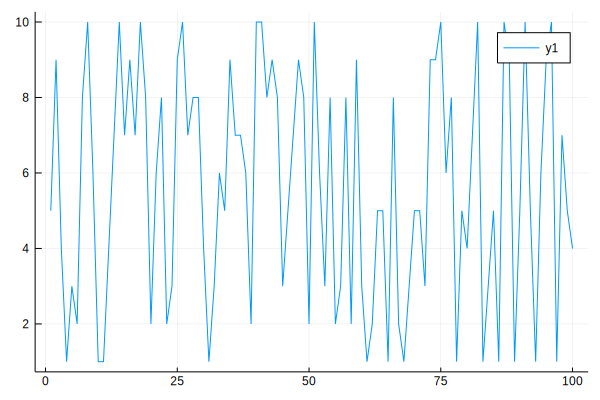

In [123]:
using Plots
y = rand(1:10, 100)
plot(y)

plot(x,y) plot la courbe passant par les points (x[k], y[k]). Il faut donc que x et y soient de même longueur !

In [124]:
x = collect(range(0,stop=10,length=101)) # génère un vecteur de taille 101 d'éléments régulièrement espacés entre 0 et 10

101-element Array{Float64,1}:
  0.0
  0.1
  0.2
  0.3
  0.4
  0.5
  0.6
  0.7
  0.8
  0.9
  1.0
  1.1
  1.2
  ⋮  
  8.9
  9.0
  9.1
  9.2
  9.3
  9.4
  9.5
  9.6
  9.7
  9.8
  9.9
 10.0

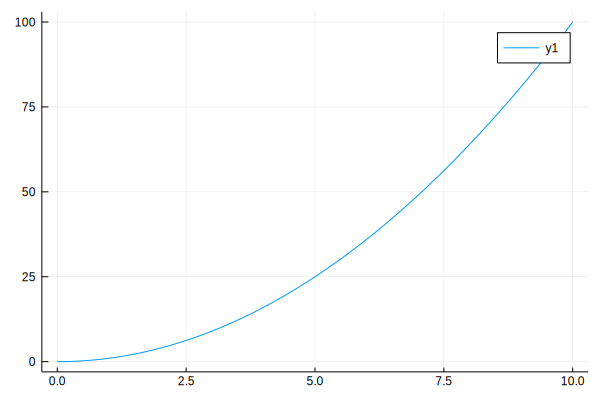

In [125]:
y = x.^2; # on prend le carré de chaque élément
plot(x,y)

Ci-dessous un exemple plus complet qui montre : 
- comment rajouter des labels, des légendes
- comment mettre plusieurs plots sur un même graphique 
- choisir la couleur, les marqueurs, le type de courbe 

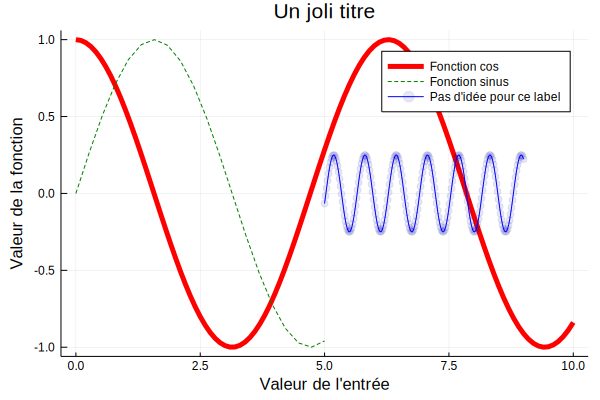

In [126]:
x = collect(range(0,stop=10,length=101));
y = cos.(x); # notez le . devant le cos pour appliquer la fonction élément par élément

x1 = collect(range(0,stop=5,length=20));
z = sin.(x1);

x2 = collect(range(5,stop=9,length=200));
w = 0.25*sin.(10*x2);

p = plot(x, y, label="Fonction cos", ylabel = "Valeur de la fonction", xlabel = "Valeur de l'entrée", 
    title="Un joli titre", color=:red, linewidth=5)

plot!(p, x1, z, color=:green, label="Fonction sinus", linewidth = 1, linestyle = :dash)

plot!(p, x2, w, marker=:circle, markeralpha=0.1, color=:blue, label="Pas d'idée pour ce label")

## Quelques fonctions avancées

Pour chercher la documentation d'une fonction julia, la syntaxe est : ?fonction_à_chercher

In [127]:
?rand

search: rand randn RankDeficientException lowrankdowndate lowrankdowndate!



```
rand([rng=GLOBAL_RNG], [S], [dims...])
```

Pick a random element or array of random elements from the set of values specified by `S`; `S` can be

  * an indexable collection (for example `1:n` or `['x','y','z']`),
  * an `AbstractDict` or `AbstractSet` object,
  * a string (considered as a collection of characters), or
  * a type: the set of values to pick from is then equivalent to `typemin(S):typemax(S)` for integers (this is not applicable to [`BigInt`](@ref)), and to $[0, 1)$ for floating point numbers;

`S` defaults to [`Float64`](@ref) (except when `dims` is a tuple of integers, in which case `S` must be specified).

# Examples

```julia-repl
julia> rand(Int, 2)
2-element Array{Int64,1}:
 1339893410598768192
 1575814717733606317

julia> rand(MersenneTwister(0), Dict(1=>2, 3=>4))
1=>2
```

!!! note
    The complexity of `rand(rng, s::Union{AbstractDict,AbstractSet})` is linear in the length of `s`, unless an optimized method with constant complexity is available, which is the case for `Dict`, `Set` and `BitSet`. For more than a few calls, use `rand(rng, collect(s))` instead, or either `rand(rng, Dict(s))` or `rand(rng, Set(s))` as appropriate.


---

```
rand([rng::AbstractRNG,] s::Sampleable)
```

Generate one sample for `s`.

```
rand([rng::AbstractRNG,] s::Sampleable, n::Int)
```

Generate `n` samples from `s`. The form of the returned object depends on the variate form of `s`:

  * When `s` is univariate, it returns a vector of length `n`.
  * When `s` is multivariate, it returns a matrix with `n` columns.
  * When `s` is matrix-variate, it returns an array, where each element is a sample matrix.

    rand([rng::AbstractRNG,] s::Sampleable, dim1::Int, dim2::Int...)   rand([rng::AbstractRNG,] s::Sampleable, dims::Dims)

Generate an array of samples from `s` whose shape is determined by the given dimensions.

---

```
rand(rng::AbstractRNG, d::UnivariateDistribution)
```

Generate a scalar sample from `d`. The general fallback is `quantile(d, rand())`.

---

```
rand(rng, d)
```

Extract a sample from the p-Generalized Gaussian distribution 'd'. The sampling procedure is implemented from from [1]. [1]  Gonzalez-Farias, G., Molina, J. A. D., & Rodríguez-Dagnino, R. M. (2009). Efficiency of the approximated shape parameter estimator in the generalized Gaussian distribution. IEEE Transactions on Vehicular Technology, 58(8), 4214-4223.

---

```
rand(::AbstractRNG, ::Distributions.AbstractMvNormal)
```

Sample a random vector from the provided multi-variate normal distribution.

---

```
rand(::AbstractRNG, ::Sampleable)
```

Samples from the sampler and returns the result.

---

```
rand(d::Union{UnivariateMixture, MultivariateMixture})
```

Draw a sample from the mixture model `d`.

```
rand(d::Union{UnivariateMixture, MultivariateMixture}, n)
```

Draw `n` samples from `d`.


### La compréhension de liste

In [128]:
a = [i for i=1:10 if i%2==0]

5-element Array{Int32,1}:
  2
  4
  6
  8
 10